In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Importing CSV
df = pd.read_csv('Invistico_Airline.csv')
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,47,Personal Travel,Eco,50,4,2,4,...,3,3,4,1,3,2,4,3,0,0.0
1,satisfied,Female,Loyal Customer,55,Personal Travel,Eco Plus,50,4,4,4,...,5,5,3,4,3,4,4,5,0,0.0
2,satisfied,Female,Loyal Customer,59,Personal Travel,Eco,50,4,5,5,...,4,4,4,4,5,5,4,4,0,3.0
3,satisfied,Female,Loyal Customer,66,Personal Travel,Eco,50,1,1,1,...,4,4,3,3,4,3,5,4,0,0.0
4,satisfied,Female,Loyal Customer,63,Personal Travel,Eco,50,4,3,3,...,4,4,4,4,4,3,4,2,0,0.0


In [3]:
# Filtering dataframe for Loyal Customer
data = df[(df["Class"]=="Business")]
data

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
9,satisfied,Female,Loyal Customer,57,Business travel,Business,50,2,2,2,...,5,4,4,4,3,3,4,2,0,0.0
10,satisfied,Female,Loyal Customer,39,Business travel,Business,50,4,4,4,...,4,4,4,4,4,3,4,4,0,0.0
11,satisfied,Male,Loyal Customer,43,Business travel,Business,50,2,2,4,...,2,4,4,4,4,4,4,5,0,0.0
12,satisfied,Male,Loyal Customer,56,Business travel,Business,50,1,1,1,...,5,4,4,4,5,4,4,5,0,0.0
13,satisfied,Female,Loyal Customer,50,Business travel,Business,50,5,5,5,...,5,4,4,4,5,5,4,4,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119602,satisfied,Male,Loyal Customer,42,Business travel,Business,6868,3,3,3,...,4,4,5,4,3,4,2,4,0,0.0
119606,satisfied,Male,Loyal Customer,44,Business travel,Business,6907,5,5,5,...,4,3,2,3,4,4,4,4,0,0.0
119608,satisfied,Female,Loyal Customer,45,Business travel,Business,6948,1,1,1,...,1,3,3,5,4,1,3,1,0,13.0
119609,satisfied,Male,Loyal Customer,46,Business travel,Business,6950,1,1,1,...,4,1,3,5,5,4,3,4,0,0.0


In [4]:
# Creating new dataframe from the filtered dataframe and dropping all demographic data
newdf = data.drop(["satisfaction", "Gender", "Customer Type", "Age", "Type of Travel","Class", "Flight Distance" ], axis=1)
feature_names = newdf.columns
newdf.head()

,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
9,2,2,2,2,4,1,5,4,4,4,3,3,4,2,0,0.0
10,4,4,4,4,4,5,4,4,4,4,4,3,4,4,0,0.0
11,2,2,4,2,2,4,2,4,4,4,4,4,4,5,0,0.0
12,1,1,1,1,5,5,5,4,4,4,5,4,4,5,0,0.0
13,5,5,5,5,2,5,5,4,4,4,5,5,4,4,0,0.0


In [5]:
target = data["satisfaction"]
target_names = ["satisfied", "dissatisfied"]

In [6]:
newdf.isnull().sum()

Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             165
dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(newdf, target, random_state=42)

In [8]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X_train)
X_train = imputer.transform(X_train)

In [9]:
X_test = imputer.transform(X_test)

In [10]:
feature_names
lst = list(feature_names)
lst

['Seat comfort',
 'Departure/Arrival time convenient',
 'Food and drink',
 'Gate location',
 'Inflight wifi service',
 'Inflight entertainment',
 'Online support',
 'Ease of Online booking',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Cleanliness',
 'Online boarding',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

In [11]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=4000000)
classifier

LogisticRegression(max_iter=4000000)

In [12]:
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=4000000)

In [13]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.8661209703306277
Testing Data Score: 0.8675974963890226


In [14]:
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
117901,dissatisfied,dissatisfied
44015,satisfied,satisfied
104064,dissatisfied,dissatisfied
78920,dissatisfied,satisfied
106436,satisfied,dissatisfied
...,...,...
57407,satisfied,satisfied
97741,satisfied,satisfied
38832,satisfied,satisfied
93797,dissatisfied,satisfied


In [15]:
import eli5
eli5.show_weights(classifier, feature_names=lst)

Weight?,Feature
+0.975,Inflight entertainment
+0.488,Leg room service
+0.425,On-board service
+0.405,Ease of Online booking
+0.341,Checkin service
+0.264,Food and drink
+0.251,Online boarding
+0.208,Seat comfort
+0.188,Online support
+0.092,Baggage handling


<AxesSubplot:>

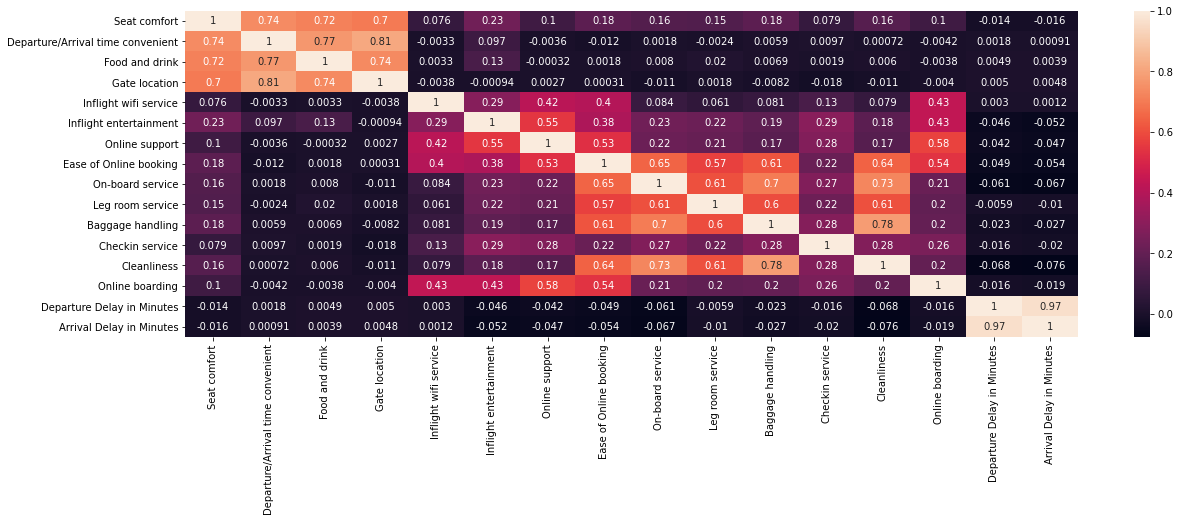

In [16]:
import seaborn as sns
cor = newdf.corr()
plt.figure(figsize = (20,6))
sns.heatmap(cor, annot=True)

In [17]:
improved = data.copy()
improved

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
9,satisfied,Female,Loyal Customer,57,Business travel,Business,50,2,2,2,...,5,4,4,4,3,3,4,2,0,0.0
10,satisfied,Female,Loyal Customer,39,Business travel,Business,50,4,4,4,...,4,4,4,4,4,3,4,4,0,0.0
11,satisfied,Male,Loyal Customer,43,Business travel,Business,50,2,2,4,...,2,4,4,4,4,4,4,5,0,0.0
12,satisfied,Male,Loyal Customer,56,Business travel,Business,50,1,1,1,...,5,4,4,4,5,4,4,5,0,0.0
13,satisfied,Female,Loyal Customer,50,Business travel,Business,50,5,5,5,...,5,4,4,4,5,5,4,4,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119602,satisfied,Male,Loyal Customer,42,Business travel,Business,6868,3,3,3,...,4,4,5,4,3,4,2,4,0,0.0
119606,satisfied,Male,Loyal Customer,44,Business travel,Business,6907,5,5,5,...,4,3,2,3,4,4,4,4,0,0.0
119608,satisfied,Female,Loyal Customer,45,Business travel,Business,6948,1,1,1,...,1,3,3,5,4,1,3,1,0,13.0
119609,satisfied,Male,Loyal Customer,46,Business travel,Business,6950,1,1,1,...,4,1,3,5,5,4,3,4,0,0.0


In [18]:
improved['Inflight entertainment improved'] = np.where((improved['Inflight entertainment'] <= 3),  improved['Inflight entertainment']+1, improved['Inflight entertainment'])
improved['On-board service improved'] = np.where((improved['On-board service'] <= 3),  improved['On-board service']+1, improved['On-board service'])
improved['Ease of Online booking improved'] = np.where((improved['Ease of Online booking'] <= 3),  improved['Ease of Online booking']+1, improved['Ease of Online booking'])


In [19]:
#improved.to_csv("test.csv")
improved

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight entertainment improved,On-board service improved,Ease of Online booking improved
9,satisfied,Female,Loyal Customer,57,Business travel,Business,50,2,2,2,...,4,3,3,4,2,0,0.0,2,4,4
10,satisfied,Female,Loyal Customer,39,Business travel,Business,50,4,4,4,...,4,4,3,4,4,0,0.0,5,4,4
11,satisfied,Male,Loyal Customer,43,Business travel,Business,50,2,2,4,...,4,4,4,4,5,0,0.0,4,4,4
12,satisfied,Male,Loyal Customer,56,Business travel,Business,50,1,1,1,...,4,5,4,4,5,0,0.0,5,4,4
13,satisfied,Female,Loyal Customer,50,Business travel,Business,50,5,5,5,...,4,5,5,4,4,0,0.0,5,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119602,satisfied,Male,Loyal Customer,42,Business travel,Business,6868,3,3,3,...,4,3,4,2,4,0,0.0,4,5,4
119606,satisfied,Male,Loyal Customer,44,Business travel,Business,6907,5,5,5,...,3,4,4,4,4,0,0.0,4,3,4
119608,satisfied,Female,Loyal Customer,45,Business travel,Business,6948,1,1,1,...,5,4,1,3,1,0,13.0,2,4,4
119609,satisfied,Male,Loyal Customer,46,Business travel,Business,6950,1,1,1,...,5,5,4,3,4,0,0.0,4,4,2


In [20]:
y_improved = improved["satisfaction"]

In [21]:
X_improved = improved.drop(["satisfaction", "Gender", "Customer Type", "Age", "Type of Travel","Class", "Flight Distance", "Inflight entertainment","Seat comfort", "On-board service" ], axis=1)

X_improved.head()

,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Online support,Ease of Online booking,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight entertainment improved,On-board service improved,Ease of Online booking improved
9,2,2,2,4,5,4,4,3,3,4,2,0,0.0,2,4,4
10,4,4,4,4,4,4,4,4,3,4,4,0,0.0,5,4,4
11,2,4,2,2,2,4,4,4,4,4,5,0,0.0,4,4,4
12,1,1,1,5,5,4,4,5,4,4,5,0,0.0,5,4,4
13,5,5,5,2,5,4,4,5,5,4,4,0,0.0,5,4,4


In [22]:
X_improved = imputer.transform(X_improved)

In [23]:
predictions = classifier.predict(X_improved)
predictions = pd.DataFrame({"Prediction": predictions, "Actual": y_improved})
predictions

,Prediction,Actual
9,dissatisfied,satisfied
10,satisfied,satisfied
11,satisfied,satisfied
12,satisfied,satisfied
13,satisfied,satisfied
...,...,...
119602,dissatisfied,satisfied
119606,satisfied,satisfied
119608,dissatisfied,satisfied
119609,dissatisfied,satisfied


In [24]:
predictions.to_csv("business_class_customer_improved_ratings.csv")